In [2]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [3]:
df = pd.read_csv("train.csv")
base_path = "./images/"

In [4]:
df

id                                                url  \
0        6e158a47eb2ca3f6  https://upload.wikimedia.org/wikipedia/commons...   
1        202cd79556f30760  http://upload.wikimedia.org/wikipedia/commons/...   
2        3ad87684c99c06e1  http://upload.wikimedia.org/wikipedia/commons/...   
3        e7f70e9c61e66af3  https://upload.wikimedia.org/wikipedia/commons...   
4        4072182eddd0100e  https://upload.wikimedia.org/wikipedia/commons...   
...                   ...                                                ...   
4132909  fc0f007893b11ba7  https://upload.wikimedia.org/wikipedia/commons...   
4132910  39aad18585867916  https://upload.wikimedia.org/wikipedia/commons...   
4132911  fd0725460e4ebbec  https://upload.wikimedia.org/wikipedia/commons...   
4132912  73691ae29e24ba19  https://upload.wikimedia.org/wikipedia/commons...   
4132913  8ef8dff6fc4790c2  https://upload.wikimedia.org/wikipedia/commons...   

         landmark_id  
0             142820  
1             104169  
2              37914  
3             102140  
4               2474  
...              ...  
4132909       172138  
4132910       162860  
4132911       191243  
4132912       145760  
4132913        34698  

[4132914 rows x 3 columns]

In [5]:
df=df.drop(['url'],axis=1)

In [6]:
df

id  landmark_id
0        6e158a47eb2ca3f6       142820
1        202cd79556f30760       104169
2        3ad87684c99c06e1        37914
3        e7f70e9c61e66af3       102140
4        4072182eddd0100e         2474
...                   ...          ...
4132909  fc0f007893b11ba7       172138
4132910  39aad18585867916       162860
4132911  fd0725460e4ebbec       191243
4132912  73691ae29e24ba19       145760
4132913  8ef8dff6fc4790c2        34698

[4132914 rows x 2 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132914 entries, 0 to 4132913
Data columns (total 2 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           object
 1   landmark_id  int64 
dtypes: int64(1), object(1)
memory usage: 63.1+ MB


In [8]:
samples = 20000
df = df.loc[:samples, :]
num_cls = len(df['landmark_id'].unique())
num_data = len(df)

In [9]:
print("Size of train data:", df.shape)
print("No. of unique classes:", num_cls)

Size of train data: (20001, 2)
No. of unique classes: 16342


In [10]:
data = pd.DataFrame(df['landmark_id'].value_counts())

data.reset_index(inplace=True) 
data.head(10)

landmark_id  count
0       138982     57
1       177870     22
2        62798     20
3       192931     16
4        83144     14
5       171772     14
6       176528     14
7        45428     11
8        84689     10
9       164773     10

In [11]:
data = data.drop(data[data['landmark_id'] == 138982].index)

In [12]:
data.head(10)

landmark_id  count
1        177870     22
2         62798     20
3        192931     16
4         83144     14
5        171772     14
6        176528     14
7         45428     11
8         84689     10
9        164773     10
10       126637     10

In [13]:
data.tail(10)

landmark_id  count
16332       147159      1
16333        20310      1
16334        80664      1
16335       149246      1
16336       162189      1
16337        61959      1
16338       194142      1
16339       171822      1
16340        55962      1
16341         4406      1

In [14]:
data.columns=['landmark_id','count']

In [15]:
data['count'].describe()

count    16341.000000
mean         1.220488
std          0.700261
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: count, dtype: float64

Text(0, 0.5, 'Occurences')

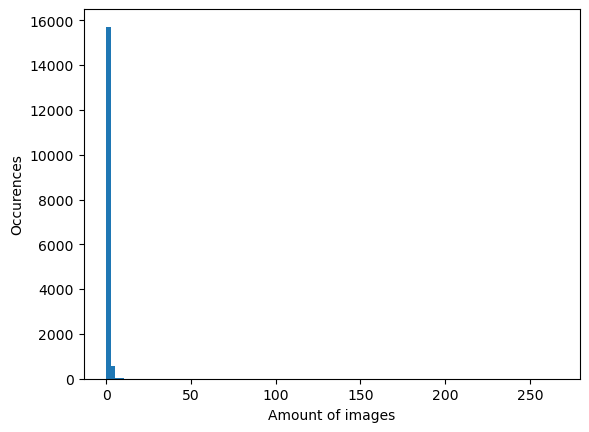

In [16]:
plt.hist(data['count'],100,range = (0,266),label = 'test')
plt.xlabel("Amount of images")
plt.ylabel("Occurences")

In [17]:
print("No. of cls with <=5 datapoints:", (data['count'].between(0,5)).sum()) 


No. of cls with <=5 datapoints: 16281


In [18]:
print("No. of cls btwn 5-10 datapoints:", (data['count'].between(5,10)).sum())

No. of cls btwn 5-10 datapoints: 92


In [19]:
#plt.hist(df["count"], bins=data["count"].unique())

In [20]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [21]:
df.head(10)

id  landmark_id
0  6e158a47eb2ca3f6       142820
1  202cd79556f30760       104169
2  3ad87684c99c06e1        37914
3  e7f70e9c61e66af3       102140
4  4072182eddd0100e         2474
5  5554f8798114ed04       149463
6  6f31b874d1a4d489         6888
7  16d8aa057cdd01b9        25719
8  3968e37e503f3109       122849
9  8df019949b8db328        81049

In [22]:
def encode_label(lbl):
    return lencoder.transform(lbl)
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)
def get_image_from_number(num, df):
    fname, label = df.iloc[num,:]
    fname = fname + ".jpg"
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path,path))
    return im, label

In [23]:
print("4 sample images from random classes:")
fig=plt.figure(figsize=(244, 244))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path+'/'+ri[0]+'/'+ri[1]+'/'+ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1, 4, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

4 sample images from random classes:


In [24]:
from keras.applications import VGG19
from keras.layers import *
from keras import Sequential

In [25]:
# Parameters
learning_rate   = 0.0001
decay_speed     = 1e-6
momentum        = 0.09
loss_function   = "sparse_categorical_crossentropy"
source_model = VGG19(weights=None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

In [26]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_cls, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [27]:
optim1 = keras.optimizers.legacy.RMSprop(learning_rate = 0.0001, momentum = 0.09)
optim2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=optim1,
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [28]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [29]:
def get_batch(dataframe,start, batch_size):
    image_array = []
    label_array = []
    end_img = start+batch_size
    if end_img > len(dataframe):
        end_img = len(dataframe)
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (244,244)) / 255.0
        image_array.append(im)
        label_array.append(label)
    label_array = encode_label(label_array)
    return np.array(image_array), np.array(label_array)

In [30]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

# Split train
train, validate = np.split(df.sample(frac=1), [int(.8*len(df))])
print("Training on:", len(train), "samples")
print("Validation on:", len(validate), "samples")

Training on: 16000 samples
Validation on: 4001 samples


In [31]:
for e in range(epochs):
    print("Epoch: ", str(e+1) + "/" + str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)
        model.train_on_batch(X_train, y_train)
model.save("Model")


Epoch:  1/1


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
### Test 
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(validate)/batch_size))):
    X_train, y_train = get_batch(validate, it*batch_size, batch_size)
    
    result = model.predict(X_train)
    cla = np.argmax(result, axis=1)
    for idx, res in enumerate(result):
        print("Class:", cla[idx], "- Confidence:", np.round(res[cla[idx]],2), "- GT:", y_train[idx])
        if cla[idx] != y_train[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cla[idx], res[cla[idx]]])
print("Errors: ", errors, "Acc:", np.round(100*(len(validate)-errors)/len(validate),2))
#Good predictions
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda x: x[2], reverse=True))
fig=plt.figure(figsize=(16, 16))
for i in range(1,6):L
    n = int(good_preds[i,0])
    img, lbl = get_image_from_number(n, validate)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, i)
    plt.imshow(img)
    lbl2 = np.array(int(good_preds[i,1])).reshape(1,1)
    sample_cnt = list(df.landmark_id).count(lbl)
    plt.title("Label: " + str(lbl) + "\nClassified as: " + str(decode_label(lbl2)) + "\nSamples in class " + str(lbl) + ": " + str(sample_cnt))
    plt.axis('off')
plt.show()